<a href="https://colab.research.google.com/github/Sarwesh2003/Heart-Disease-Prediction/blob/main/Heart_Diesease_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Implementation**

# Importing Libraries

In [2]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.9 MB/s 


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Importing Dataset

In [4]:
dataset=pd.read_csv("/content/heart_data.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
dataset.shape

(303, 14)

In [ ]:
x.shape

(303, 13)

In [ ]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [ ]:
y.shape

(303,)

# Splitting Training Data and Testing Data

In [5]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.2, stratify=y,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
Y_train.shape

(242,)

# Modelling

In [43]:
Models=[]
Accuracy=[]
KF=[]
def save_accuracy(model, accuracy, kf_min, kf_max):
    Models.append(model)
    Accuracy.append(accuracy)
    round(kf_min,2)
    round(kf_max,2)
    KF.append(str(kf_min)+" - "+str(kf_max))

In [44]:
Models.clear()
Accuracy.clear()
KF.clear()

# SVM

In [8]:
svm_model=svm.SVC(kernel="linear")
svm_model.fit(X_train, Y_train)
svm_pred=svm_model.predict(X_test)
accuracy_svm=round(accuracy_score(svm_pred, Y_test)*100,2)
print("Accuracy of SVM is: "+str(accuracy_svm))

Accuracy of SVM is: 86.89


In [45]:
svm_kf = cross_val_score(estimator = svm_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Kernel SVM", accuracy_svm, svm_kf.min()*100, svm_kf.max()*100)

# Logistic Regression

In [12]:
LR_classifier= LogisticRegression(fit_intercept= False, n_jobs= 1)      #Model Trainging
LR_classifier.fit(X_train, Y_train)
lr_pred=LR_classifier.predict(X_test)
accuracy_lr=round(accuracy_score(Y_test,lr_pred)*100,2)
print("Accuracy of LR is: "+str(accuracy_lr))

Accuracy of LR is: 88.52


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
lr_kf = cross_val_score(estimator = LR_classifier, X = X_train, y = Y_train, cv = 10)
print(lr_kf)
save_accuracy("Logistic Regression", accuracy_lr, lr_kf.min()*100, lr_kf.max()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.88       0.8        0.875      0.875      0.91666667 0.875
 0.79166667 0.70833333 0.70833333 0.83333333]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Naive Bayes

In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_pred=nb_model.predict(X_test)
accuracy_nb=round(accuracy_score(Y_test,nb_pred)*100,2)
print("Accuracy of Naive Bayes is: "+str(accuracy_nb))

Accuracy of Naive Bayes is: 80.33


In [47]:
nb_kf = cross_val_score(estimator = nb_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Naive Bayes", accuracy_nb, nb_kf.min()*100, nb_kf.max()*100)
print(nb_kf)

[0.84       0.68       0.875      0.91666667 0.875      0.83333333
 0.75       0.75       0.66666667 0.91666667]


# K-NN

In [19]:
knn_model = KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_jobs = 1, n_neighbors = 20, weights = 'uniform', p = 1)
knn_model.fit(X_train, Y_train)
knn_pred=knn_model.predict(X_test)
accuracy_knn=round(accuracy_score(Y_test,knn_pred)*100,2)
print("Accuracy of K-NN is: "+str(accuracy_knn))

Accuracy of K-NN is: 78.69


In [48]:
knn_kf = cross_val_score(estimator = knn_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("K-Nearest Neighbors", accuracy_knn, knn_kf.min()*100, knn_kf.max()*100)
print(nb_kf)

[0.84       0.68       0.875      0.91666667 0.875      0.83333333
 0.75       0.75       0.66666667 0.91666667]


# Multi-Layer Perceptrons

In [21]:
mlp_model = MLPClassifier(hidden_layer_sizes = (128, 164), activation="logistic", learning_rate="adaptive", learning_rate_init=0.01)
mlp_model.fit(X_train, Y_train)
mlp_pred=mlp_model.predict(X_test)
accuracy_mlp=round(accuracy_score(Y_test,mlp_pred)*100,2)
print("Accuracy of Multi-Layer Perceptrons is: "+str(accuracy_mlp))

Accuracy of Multi-Layer Perceptrons is: 86.89


In [49]:
mlp_kf = cross_val_score(estimator = mlp_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Multi-Layer Perceptrons", accuracy_mlp, mlp_kf.min()*100, mlp_kf.max()*100)
print(mlp_kf)

[0.92       0.56       0.75       0.91666667 0.83333333 0.66666667
 0.70833333 0.45833333 0.54166667 0.625     ]


# Artificial Neural Network

In [23]:
ann_model = Sequential()
ann_model.add(Dense(11,activation='relu',input_dim=13))
ann_model.add(Dense(1,activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
ann_model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 31.5694 - accuracy: 0.4545
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 25.4606 - accuracy: 0.4545
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 19.2295 - accuracy: 0.4545
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 13.2054 - accuracy: 0.4545
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 7.1822 - accuracy: 0.4545
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 2.1240 - accuracy: 0.5041
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 1.9169 - accuracy: 0.5372
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 1.7342 - accuracy: 0.5248
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 1.1115 - accuracy: 0.5785
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 1.1817 - accuracy: 0.5868
Epoch 11/300
8/8 [=======

In [50]:
Y_pred_ann = ann_model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_ann]
Y_pred_ann = rounded
accuracy_ann = round(accuracy_score(Y_pred_ann,Y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(accuracy_ann)+" %")
save_accuracy("Artificial Neural Networks", accuracy_ann, 86,86)

The accuracy score achieved using Neural Network is: 85.25 %


# Decision Tree

In [31]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, Y_train)
dt_pred=dt_model.predict(X_test)
accuracy_dt=round(accuracy_score(Y_test,dt_pred)*100,2)
print("Accuracy of Decision Tree is: "+str(accuracy_dt))

Accuracy of Decision Tree is: 85.25


In [51]:
dt_kf = cross_val_score(estimator = dt_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Decision Tree", accuracy_dt, dt_kf.min()*100, dt_kf.max()*100)
print(dt_kf)

[0.84       0.76       0.66666667 0.875      0.70833333 0.91666667
 0.625      0.66666667 0.58333333 0.875     ]


# Random Forest

In [ ]:
max_accuracy=88.52
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        print(best_x)

In [33]:
rf_model = RandomForestClassifier(random_state=221)
rf_model.fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
accuracy_rf=round(accuracy_score(Y_test,rf_pred)*100,2)
print("Accuracy of Random Forest is: "+str(accuracy_rf))

Accuracy of Random Forest is: 88.52


In [52]:
rf_kf = cross_val_score(estimator = rf_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Random Forest", accuracy_rf, rf_kf.min()*100, rf_kf.max()*100)
print(rf_kf)

[0.92       0.76       0.79166667 0.91666667 0.75       0.95833333
 0.70833333 0.66666667 0.75       0.95833333]


# XGBoost

In [35]:
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0, 
                           learning_rate=1.3, max_delta_step=0, max_depth=9, min_child_weight=1, missing=None, n_estimators=150, 
                           n_jobs=-1, nthread=None, objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, 
                           scale_pos_weight=1, seed=None, silent=None, subsample=1, tree_method='auto', verbosity=1)
xgb_model.fit(X_train, Y_train)
xgb_pred=xgb_model.predict(X_test)
accuracy_xgb=round(accuracy_score(Y_test,xgb_pred)*100,2)
print("Accuracy of Random Forest is: "+str(accuracy_xgb))

Accuracy of Random Forest is: 88.52


In [53]:
xgb_kf = cross_val_score(estimator = xgb_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("XGBoost", accuracy_xgb, xgb_kf.min()*100, xgb_kf.max()*100)
print(xgb_kf)

[0.88       0.8        0.75       0.79166667 0.79166667 0.91666667
 0.75       0.75       0.79166667 0.83333333]


# CatBoost

In [37]:
cb_model = CatBoostClassifier()
cb_model.fit(X_train, Y_train)
cb_pred=cb_model.predict(X_test)
accuracy_cb=round(accuracy_score(Y_test,cb_pred)*100,2)
print("Accuracy of CatBoost is: "+str(accuracy_cb))

Learning rate set to 0.005621
0:	learn: 0.6882198	total: 49.2ms	remaining: 49.1s
1:	learn: 0.6834027	total: 52.2ms	remaining: 26.1s
2:	learn: 0.6791303	total: 53.4ms	remaining: 17.7s
3:	learn: 0.6745002	total: 54.5ms	remaining: 13.6s
4:	learn: 0.6709029	total: 55.5ms	remaining: 11s
5:	learn: 0.6667467	total: 56.6ms	remaining: 9.38s
6:	learn: 0.6640914	total: 57.4ms	remaining: 8.14s
7:	learn: 0.6602617	total: 58.4ms	remaining: 7.24s
8:	learn: 0.6567380	total: 59.3ms	remaining: 6.53s
9:	learn: 0.6525185	total: 60.3ms	remaining: 5.97s
10:	learn: 0.6483112	total: 61.3ms	remaining: 5.51s
11:	learn: 0.6442022	total: 62.4ms	remaining: 5.13s
12:	learn: 0.6407270	total: 63.4ms	remaining: 4.81s
13:	learn: 0.6366910	total: 64.4ms	remaining: 4.53s
14:	learn: 0.6346663	total: 65.1ms	remaining: 4.27s
15:	learn: 0.6300007	total: 66ms	remaining: 4.06s
16:	learn: 0.6258864	total: 67ms	remaining: 3.88s
17:	learn: 0.6219796	total: 68.1ms	remaining: 3.71s
18:	learn: 0.6192238	total: 68.9ms	remaining: 3.56

In [54]:
cb_kf = cross_val_score(estimator = cb_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("CatBoost", accuracy_cb, cb_kf.min()*100, cb_kf.max()*100)
print(cb_kf)

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6659943	total: 7.97ms	remaining: 1.13s
7:	learn: 0.6618304	total: 9.3ms	remaining: 1.15s
8:	learn: 0.6579302	total: 10.5ms	remaining: 1.15s
9:	learn: 0.6546959	total: 11.6ms	remaining: 1.15s
10:	learn: 0.6507322	total: 12.7ms	remaining: 1.14s
11:	learn: 0.6471734	total: 14ms	remaining: 1.16s
12:	learn: 0.6444458	total: 15.2ms	remaining: 1.16s
13:	learn: 0.6406550	total: 16.1ms	remaining: 1.13s
14:	learn: 0.6372206	total: 17.2ms	remaining: 1.13s
15:	learn: 0.6336820	total: 18.3ms	remaining: 1.12s
16:	learn: 0.6307628	total: 19.3ms	remaining: 1.11s
17:	learn: 0.6272050	total: 20.4ms	remaining: 1.11s
18:	learn: 0.6245214	total: 21.4ms	remaining: 1.1s
19:	learn: 0.6214989	total: 22.3ms	remaining: 1.09s
20:	learn: 0.6184927	total: 23.3ms	remaining: 1.09s
21:	learn: 0.6158613	total: 24.4ms	remaining: 1.08s
22:	learn: 0.6122805	total: 25.6ms	remaining: 1.08s
23:	learn: 0.6100277	total: 26.7ms	remaining: 1.09s
24:	learn: 0.6072883	

# Evaluating Models

In [55]:
model_results=pd.DataFrame({"ML Model": Models,
                     "Confusion Matrix Accuracy": Accuracy,
                     "K-Folds Accuracy": KF})

In [57]:
model_results

,ML Model,Confusion Matrix Accuracy,K-Folds Accuracy
0,Kernel SVM,86.89,70.83333333333334 - 92.0
1,Logistic Regression,88.52,70.83333333333334 - 91.66666666666666
2,Naive Bayes,80.33,66.66666666666666 - 91.66666666666666
3,K-Nearest Neighbors,78.69,50.0 - 87.5
4,Multi-Layer Perceptrons,86.89,45.83333333333333 - 92.0
5,Artificial Neural Networks,85.25,86 - 86
6,Decision Tree,85.25,58.333333333333336 - 91.66666666666666
7,Random Forest,88.52,66.66666666666666 - 95.83333333333334
8,XGBoost,88.52,75.0 - 91.66666666666666
9,CatBoost,86.89,70.83333333333334 - 95.83333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


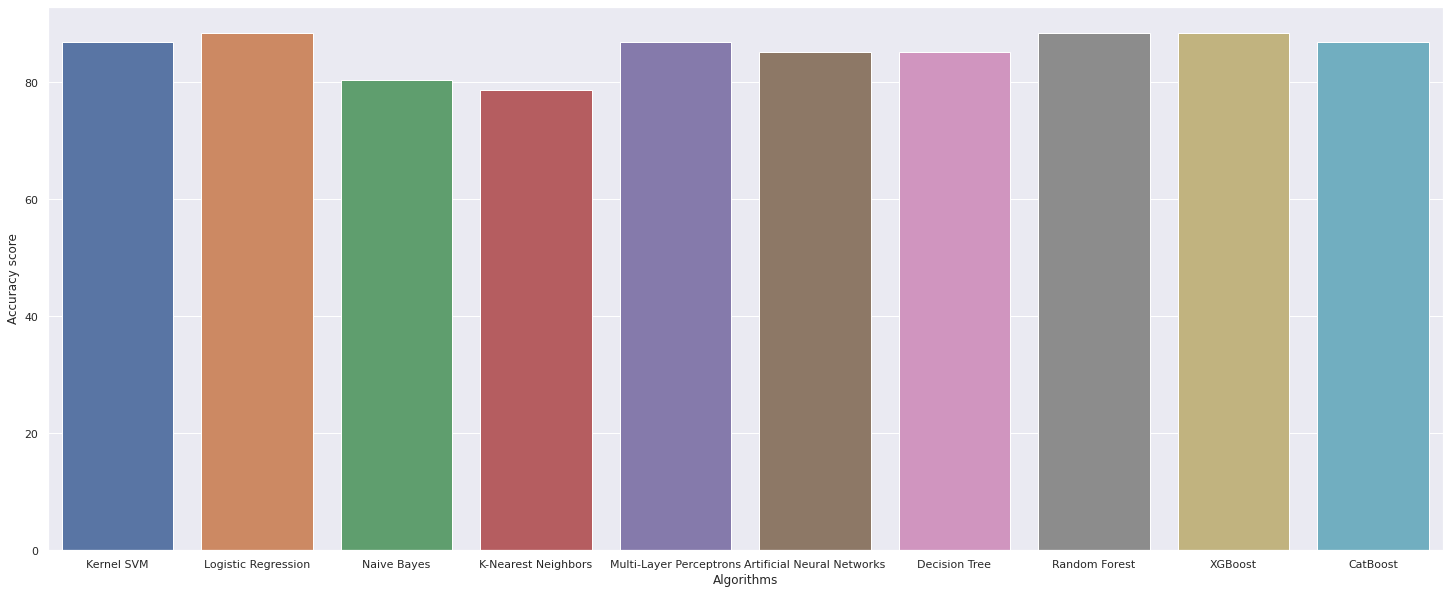

In [64]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(Models,Accuracy)